<a href="https://colab.research.google.com/github/dcolinmorgan/test/blob/master/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#bash to install required packages colab doesnt have

In [1]:
!pip install covid19pandas
!pip install geopandas

     |████████████████████████████████| 972kB 3.4MB/s 
     |████████████████████████████████| 14.8MB 283kB/s 
     |████████████████████████████████| 10.9MB 27.0MB/s 


In [4]:
import covid19pandas as cod
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import datetime
import folium
import descartes
from shapely.geometry import Point, Polygon

import and grab data

In [36]:
df = cod.get_data_jhu()
df2 = cod.get_data_nyt(counties=True)
df2

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).
These data were obtained from The New York Times (https://github.com/nytimes/covid-19-data).


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
625202,2020-10-12,Sweetwater,Wyoming,56037.0,394,2
625203,2020-10-12,Teton,Wyoming,56039.0,675,1
625204,2020-10-12,Uinta,Wyoming,56041.0,381,2
625205,2020-10-12,Washakie,Wyoming,56043.0,125,6


In [ ]:
for i in range(df2.shape[0]):
  for j in range(df2.shape[1]):
    if df2.iloc[j,i] is int:
      print(df2[j,i]>30)

In [32]:
df2[1,1]

'Snohomish'

In [37]:
df3=df2[df2['state']=='Washington']
df3[df3['cases']>30]

,date,county,state,fips,cases,deaths
527,2020-03-04,King,Washington,53033.0,33,11
576,2020-03-05,King,Washington,53033.0,52,11
649,2020-03-06,King,Washington,53033.0,59,12
743,2020-03-07,King,Washington,53033.0,72,16
855,2020-03-08,King,Washington,53033.0,91,18
...,...,...,...,...,...,...
625049,2020-10-12,Thurston,Washington,53067.0,1467,21
625052,2020-10-12,Walla Walla,Washington,53071.0,963,7
625053,2020-10-12,Whatcom,Washington,53073.0,1458,58
625054,2020-10-12,Whitman,Washington,53075.0,1539,2


In [ ]:
uniq_county=pd.unique(df2.county)
pd.DataFrame(uniq_county)#[0:(len(uniq_county))].to_list()

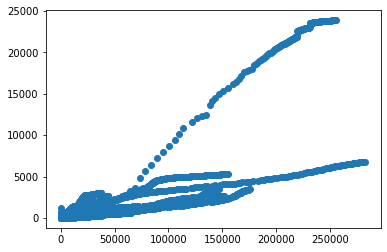

In [16]:
plt.scatter(df2.cases,df2.deaths)

#plot function from github

In [ ]:
def plot_days_vs_count(data_type="cases", min_count=100, num_countries=10, y_logscale=True):
    
    data = cod.get_data_jhu(data_type=data_type) # Get the data
    last_day = data["date"].max() # Get the last recorded day

    current_ct = data[data['date'] == last_day] # Pull all records for that day
    current_ct = current_ct[["Country/Region", data_type]] # Drop unnecessary columns
    current_ct = current_ct.groupby("Country/Region").aggregate(np.sum)

    top_names = current_ct.sort_values(by=data_type).tail(num_countries)
    top_cts = data[data["Country/Region"].isin(top_names.index)] # Filter out other countries
    top_cts = top_cts[["date", "Country/Region", data_type]] # Get the columns we want
    top_cts = top_cts.groupby(
        ["date", "Country/Region"]).aggregate(np.sum).reset_index() # Sum up total cases per day, per country

    country_groups = top_cts.groupby("Country/Region") # Create pandas GroupBy object on country

    country_day_cts = pd.DataFrame(columns=["day", "Country/Region", data_type]) # We'll append everything to this
    for country in top_names.index:

        country_tbl = country_groups.get_group(country)
        country_tbl = country_tbl[country_tbl[data_type] >= min_count] # Select only days with 100 or more cases
        assert(country_tbl["date"].duplicated().sum() == 0) # Verify there are no duplicate days

        day_number_col = range(0, len(country_tbl.index)) # Generate a column of day number since 100 cases
        country_tbl.insert(loc=0, column="day", value=day_number_col) # Insert the column
        country_tbl = country_tbl.drop(columns="date") # We don't need the date column anymore

        country_day_cts = pd.concat([country_day_cts, country_tbl]).sort_values(by="day")

    country_day_cts = country_day_cts.apply(pd.to_numeric, errors="ignore")
    country_day_cts

    sns.set_style("darkgrid") # Set the plot colors
    plt.figure(figsize=(15, 8)) # Set desired dimensions

    ax = sns.lineplot(x="day", 
                y=data_type, 
                data=country_day_cts,
                hue="Country/Region")

    if y_logscale:
        ax.set(title=f"Days since 100th case vs. number of {data_type}, log scale",
              xlabel="Days since 100th case",
              ylabel=f"Number of {data_type} (log scale)",
              yscale="log")
    else:
        ax.set(title=f"Days since 100th case vs. number of {data_type}, no log scale",
              xlabel="Days since 100th case",
              ylabel=f"Number of {data_type}")
        
    plt.show()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


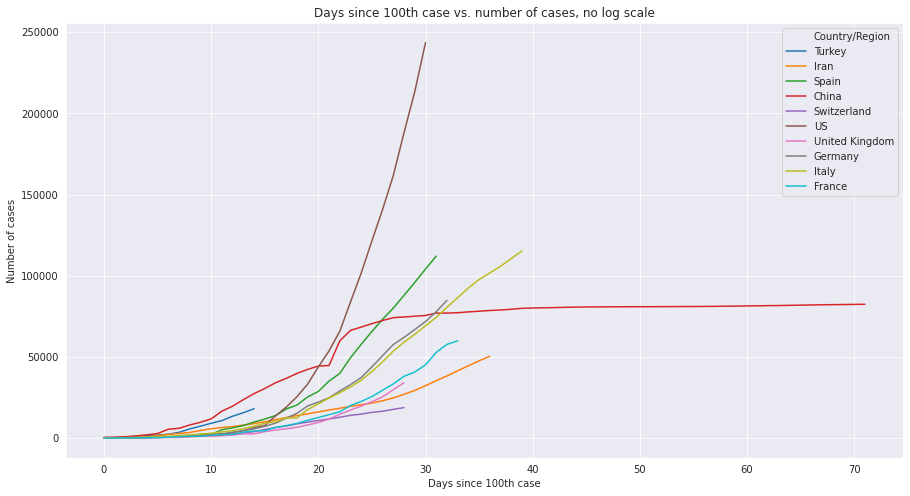

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


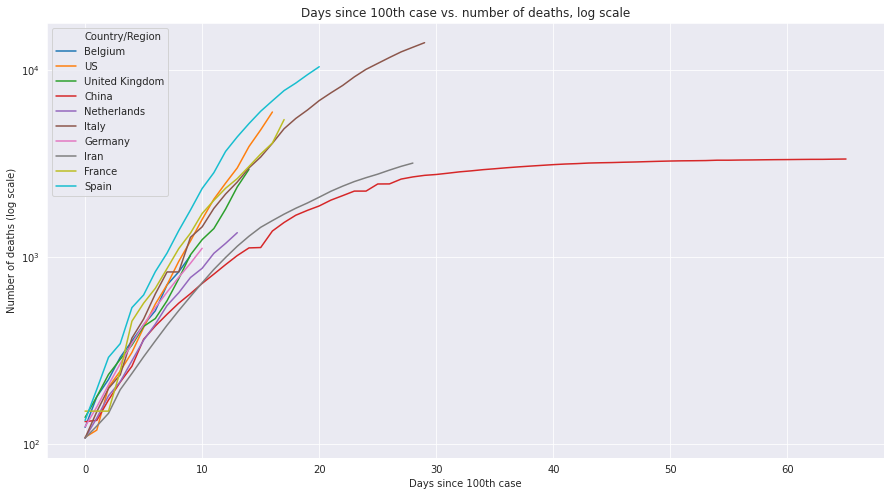

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


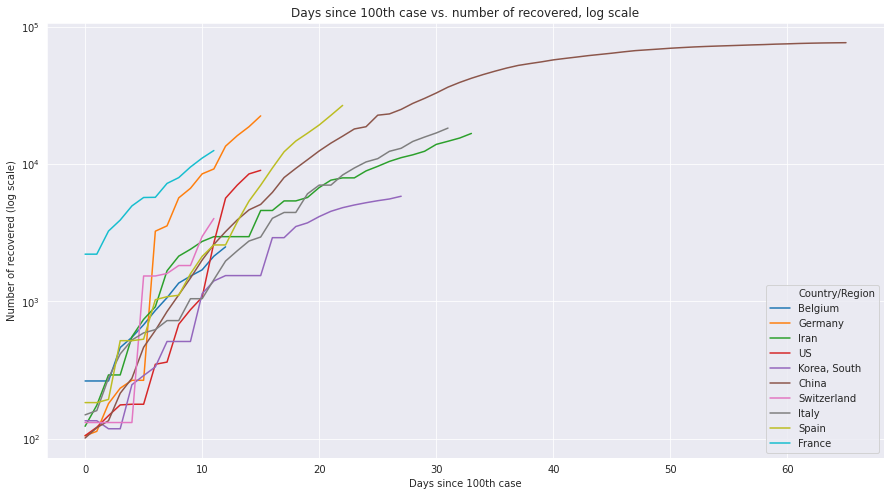

In [ ]:
plot_days_vs_count(data_type="cases", min_count=100, num_countries=10, y_logscale=False)
plot_days_vs_count(data_type="deaths", min_count=100, num_countries=10, y_logscale=True)
plot_days_vs_count(data_type="recovered", min_count=100, num_countries=10, y_logscale=True)

#bash stuff to grab some image files (of ohio)

In [ ]:
!wget https://mapcruzin.com/download-shapefile/us/ohio_administrative.zip
!unzip ohio_administrative.zip

--2020-04-03 12:35:46--  https://mapcruzin.com/download-shapefile/us/ohio_administrative.zip
Resolving mapcruzin.com (mapcruzin.com)... 104.27.135.94, 104.27.134.94, 2606:4700:3030::681b:875e, ...
Connecting to mapcruzin.com (mapcruzin.com)|104.27.135.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3234196 (3.1M) [application/zip]
Saving to: ‘ohio_administrative.zip’

ohio_administrative 100%[===================>]   3.08M  18.9MB/s    in 0.2s    

2020-04-03 12:35:47 (18.9 MB/s) - ‘ohio_administrative.zip’ saved [3234196/3234196]

Archive:  ohio_administrative.zip
  inflating: readme.txt              
  inflating: ohio_administrative.dbf  
  inflating: ohio_administrative.prj  
  inflating: ohio_administrative.shp  
  inflating: ohio_administrative.shx  
 extracting: Archive created by free jZip.url  


#setup geo dataframe

In [ ]:
map=gpd.read_file('ohio_administrative.shp')

df = cod.get_data_jhu(region='us')
df=df[df['Province_State']=='Ohio']
# df2 = cod.get_data_jhu(data_type="deaths",region='us')
# df2=df2[df2['Province_State']=='Ohio']

geometry = [Point(xy) for xy in zip( df['Long'], df['Lat'])]
geo_df=gpd.GeoDataFrame(df,crs={'init':'epsg:4326'},geometry=geometry)
# geometry2 = [Point(xy) for xy in zip( df2['Long'], df2['Lat'])]
# geo_df2=gpd.GeoDataFrame(df2,crs={'init':'epsg:4326'},geometry=geometry2)

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


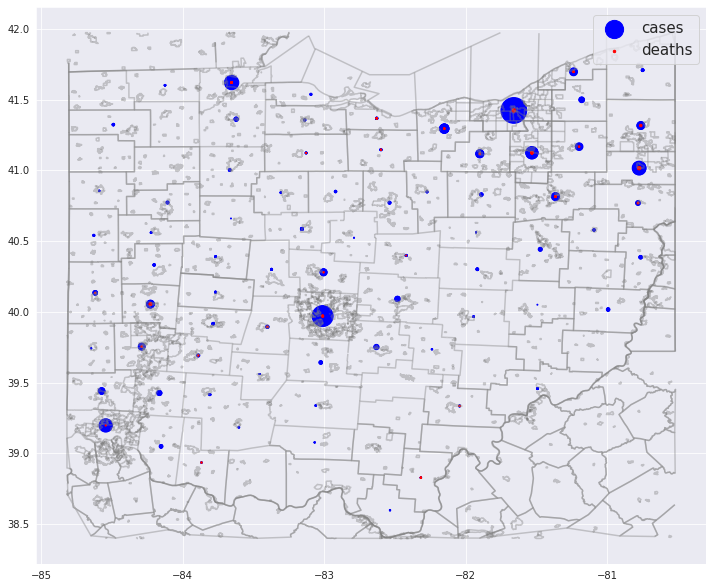

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(ax=ax,markersize=geo_df.cases,color='blue',marker='o',label='cases')
geo_df.plot(ax=ax,markersize=geo_df.deaths,color='red',marker='o',label='deaths')

plt.legend(prop={'size':15})

#this dataframe is ugly but counts new deaths and cases

In [ ]:
def count_per_day_with_daily(data3):
  # county="Cuyahoga"

  # data3 = cod.get_data_jhu(region="us")
  # data3 = geo_df[geo_df["Admin2"] == county]
  
  # data3 = data3[["date"]] # We only need these columns
  data3 = data3.groupby("date").aggregate(np.sum)
  data3 = data3.reset_index()
  temp_col = list(data3['cases'])
  temp_col = [0] + temp_col[:-1] # Offset all value by 1 row
  daily_new_cases = data3['cases'] - temp_col
  data3.insert(1, f"newcases_", daily_new_cases)
  temp_col = list(data3['deaths'])
  temp_col = [0] + temp_col[:-1] # Offset all value by 1 row
  daily_new_deaths = data3['deaths'] - temp_col
  data3.insert(1, f"newdeaths_", daily_new_deaths)
  data4 = data3.melt(id_vars=["date",'cases'], var_name="count_type", value_name="count").sort_values(by="date")
  data4["count"] = data4["count"].apply(pd.to_numeric)
  data5 = data3.melt(id_vars=["date",'deaths'], var_name="count_type", value_name="count").sort_values(by="date")
  data5["count"] = data5["count"].apply(pd.to_numeric)

  jj=data4[data4['count_type']=='newcases_']
  jj=jj.merge(data5[data5['count_type']=='newdeaths_'],left_on="date",right_on="date")
  del jj['count_type_x'], jj['count_x'],jj['count_type_y'],jj['count_y']
  jj=jj.merge(data3,left_on="date",right_on="date")
  del jj['UID'], jj['code3'],jj['Lat'],jj['Long'],jj['Population'], jj['cases_x'],jj['deaths_y'],jj['FIPS']


  sns.set_style("darkgrid") # Set the plot colors
  plt.figure(figsize=(15, 8)) # Set desired dimensions

  ax=sns.lineplot(x='date', y='value', hue='variable', 
              data=pd.melt(jj, ['date']))

  ax.set(title=f"{country}: Day vs. Counts",
        xlabel="Day",yscale='log',
        ylabel="Log Count")


  # sns.lineplot(x="date", 
  #             y="count", 
  #             data=dat3,
  #             hue="count_type")

  plt.show()

#use folium to plot (no image file needed)

In [ ]:
df = cod.get_data_jhu(region='us')
df=df[df['Province_State']=='Ohio']
df['date'] = df['date'].astype(str)
geometry = [Point(xy) for xy in zip( df['Long'], df['Lat'])]
geo_df=gpd.GeoDataFrame(df,crs={'init':'epsg:4326'},geometry=geometry)
gjson=geo_df.to_json()
mapa = folium.Map([41.424119, 	-81.659183],
                  zoom_start=7,
                  tiles='cartodbpositron')

points = folium.features.GeoJson(gjson)
mapa.add_children(points)

# width, height = 310,110
# popups, locations = [], []
# for w in np.unique(geo_df['Admin2']):
#     data3=geo_df[geo_df['Admin2']==w]
#     locations.append([pd.unique(data3['Long']), pd.unique(data3['Lat'])])
#     j=count_per_day_with_daily(data3)
#     iframe = IFrame(j, width=width, height=height)
#     popups.append(iframe)
# kw=dict(popup=popups,marker_color='red',marker_icon='question_sign')
# mapa.simple_marker(location=locations, **kw)

mapa

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  if sys.path[0] == '':


In [ ]:
# from folium import IFrame
# from folium.plugins import MarkerCluster

# width, height = 310,110
# popups, locations = [], []
# for idx, row in np.unique(geo_df['Admin2']):
#     locations.append([row['geometry'].y, row['geometry'].x])

#     j=count_per_day_with_daily(geo_df['Admin2'])
#     iframe = IFrame(j, width=width, height=height)
#     popups.append(iframe)

# h = folium.FeatureGroup(name='cases')
# h.add_children(MarkerCluster(locations=locations, popups=popups)
# mapa.add_children(h)

In [ ]:
##this is some stupid json/html junk
table = """
<!DOCTYPE html>
<html>
<head>
<style>
table {{
    width:100%;
}}
table, th, td {{
    border: 1px solid black;
    border-collapse: collapse;
}}
th, td {{
    padding: 5px;
    text-align: left;
}}
table#t01 tr:nth-child(odd) {{
    background-color: #eee;
}}
table#t01 tr:nth-child(even) {{
   background-color:#fff;
}}
</style>
</head>
<body>

<table id="t01">
  <tr>
    <td>Type</td>
    <td>{}</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>{}</td>
  </tr>
  <tr>
    <td>Operational</td>
    <td>{}</td>
  </tr>
</table>
</body>
</html>
""".format

In [ ]:
from folium import IFrame
from folium.plugins import MarkerCluster

width, height = 310,110
popups, locations = [], []
for idx, row in geo_df.iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])
    name = (row['UID'],'_',row['date'])
    if row['deaths']>0:
        opr = 'Yes'
    elif row['deaths'] ==0:
        opr = 'No'
    else:
        opr = 'NA'
    iframe = IFrame(table('deaths', name, opr), width=width, height=height)
    popups.append(iframe)
    
t = folium.FeatureGroup(name='deaths')
t.add_children(MarkerCluster(locations=locations, popups=popups))
mapa.add_children(t)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
